In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"merged_rides__with_elevation.csv")
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_Altitude,End_Altitude,end_altitude,end_Altitude,Start_Altutude,State_Altitude,Elevation_Change
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59,1/13/2022 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,184.1,603.6,NaN,NaN,NaN,NaN,419.5
1,A6CF8980A652D272,electric_bike,1/10/2022 8:41,1/10/2022 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,184.6,603.6,NaN,NaN,NaN,NaN,419.0
2,BD0F91DFF741C66D,classic_bike,1/25/2022 4:53,1/25/2022 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,181.7,592.5,NaN,NaN,NaN,NaN,410.8
3,CBB80ED419105406,classic_bike,1/4/2022 0:18,1/4/2022 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,182.9,598.1,NaN,NaN,NaN,NaN,415.2
4,DDC963BFDDA51EEA,classic_bike,1/20/2022 1:31,1/20/2022 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,182.5,594.7,NaN,NaN,NaN,NaN,412.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387550,F74DF9549B504A6B,electric_bike,12/7/2023 13:15,12/7/2023 13:17,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,180.0,180.2,NaN,NaN,NaN,NaN,0.2
11387551,BCDA66E761CC1029,classic_bike,12/8/2023 18:42,12/8/2023 18:45,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,179.9,180.2,NaN,NaN,NaN,NaN,0.3
11387552,D2CF330F9C266683,classic_bike,12/5/2023 14:09,12/5/2023 14:13,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,179.9,180.2,NaN,NaN,NaN,NaN,0.3
11387553,3829A0D1E00EE970,electric_bike,12/2/2023 21:36,12/2/2023 21:53,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual,181.2,180.4,NaN,NaN,NaN,NaN,-0.8


In [3]:
df=df.drop_duplicates()

In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [5]:

# Function to categorize season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
# Function to categorize part of the day
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply functions to categorize 'Start Time' into new columns
df['Day'] = df['started_at'].dt.day_name()
df['Time of Day'] = df['started_at'].dt.hour.apply(get_part_of_day)
df['Same Station Trip'] = (df['start_station_name'] == df['end_station_name'])
df['Season'] = df['started_at'].dt.month.apply(get_season)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,End_Altitude,end_altitude,end_Altitude,Start_Altutude,State_Altitude,Elevation_Change,Day,Time of Day,Same Station Trip,Season
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,...,603.6,NaN,NaN,NaN,NaN,419.5,Thursday,Morning,False,Winter
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,...,603.6,NaN,NaN,NaN,NaN,419.0,Monday,Morning,False,Winter
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,...,592.5,NaN,NaN,NaN,NaN,410.8,Tuesday,Night,False,Winter
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,...,598.1,NaN,NaN,NaN,NaN,415.2,Tuesday,Night,False,Winter
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,...,594.7,NaN,NaN,NaN,NaN,412.2,Thursday,Night,False,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387550,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,...,180.2,NaN,NaN,NaN,NaN,0.2,Thursday,Afternoon,False,Winter
11387551,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,180.2,NaN,NaN,NaN,NaN,0.3,Friday,Evening,False,Winter
11387552,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,180.2,NaN,NaN,NaN,NaN,0.3,Tuesday,Afternoon,False,Winter
11387553,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,...,180.4,NaN,NaN,NaN,NaN,-0.8,Saturday,Night,False,Winter


In [7]:
print(df['start_lat'].dtype)


float64


In [6]:



def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 

    # Radius of earth in kilometers is approximately 6371
    km = 6371 * c
    return km

# Apply the haversine function to each row in the DataFrame
df['distance'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_altitude,end_Altitude,Start_Altutude,State_Altitude,Elevation_Change,Day,Time of Day,Same Station Trip,Season,distance
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,...,NaN,NaN,NaN,NaN,419.5,Thursday,Morning,False,Winter,0.699547
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,...,NaN,NaN,NaN,NaN,419.0,Monday,Morning,False,Winter,0.694322
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,...,NaN,NaN,NaN,NaN,410.8,Tuesday,Night,False,Winter,1.000832
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,...,NaN,NaN,NaN,NaN,415.2,Tuesday,Night,False,Winter,2.462779
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,...,NaN,NaN,NaN,NaN,412.2,Thursday,Night,False,Winter,0.814537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387550,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,...,NaN,NaN,NaN,NaN,0.2,Thursday,Afternoon,False,Winter,0.598341
11387551,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,NaN,NaN,NaN,NaN,0.3,Friday,Evening,False,Winter,0.598173
11387552,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,NaN,NaN,NaN,NaN,0.3,Tuesday,Afternoon,False,Winter,0.598173
11387553,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,...,NaN,NaN,NaN,NaN,-0.8,Saturday,Night,False,Winter,1.933195


                 Generalized Linear Model Regression Results                  
Dep. Variable:        Number_of_Trips   No. Observations:                  672
Model:                            GLM   Df Residuals:                      655
Model Family:                 Poisson   Df Model:                           16
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6781e+05
Date:                Sat, 20 Apr 2024   Deviance:                   5.2898e+05
Time:                        00:50:39   Pearson chi2:                 6.23e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

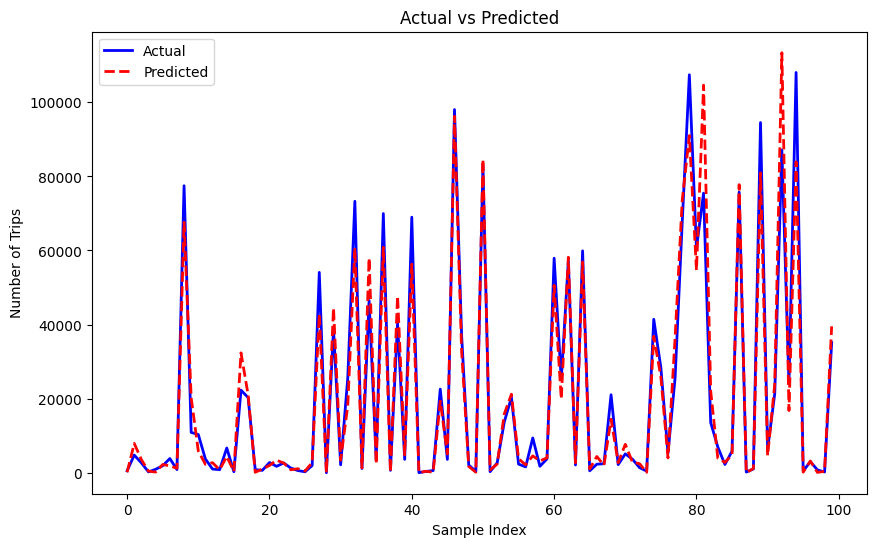

<Figure size 640x480 with 0 Axes>

In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Aggregate data to count number of trips per 'Season' and calculate average distance
agg_df = df.groupby(['rideable_type','Day', 'Season', 'Time of Day', 'Same Station Trip']).agg(
    Number_of_Trips=('ride_id', 'count'),
    Distance_avg=('distance', 'mean')
).reset_index()

agg_df = pd.get_dummies(agg_df, columns=['rideable_type', 'Day', 'Season', 'Time of Day', 'Same Station Trip'], drop_first=True)



# Define independent and dependent variables
X = agg_df.drop(columns=['Number_of_Trips'])
y = agg_df['Number_of_Trips']

# Convert all columns in X to float, coercing errors to NaN
X = X.astype(float)

# Drop any columns with NaN values (these were non-numeric columns)
X = X.dropna(axis=1)

# Check for constant columns and drop them
constant_columns = X.columns[X.nunique() <= 1]
X = X.drop(columns=constant_columns)

# Add constant to the model
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(model.summary())

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model_train = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predict on training data and calculate RMSE
train_preds = model_train.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print(f"Train RMSE: {train_rmse}")

# Predict on test data and calculate RMSE
test_preds = model_train.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f"Test RMSE: {test_rmse}")

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], 'b-', label='Actual', linewidth=2)
plt.plot(test_preds.values[:100], 'r--', label='Predicted', linewidth=2)
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Number of Trips")
plt.show()

# Save the plot
plt.savefig("merged_data_regression.png")
plt.clf()

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Aggregate data to count number of trips per 'Season' and calculate average distance
agg_df = df.groupby(['rideable_type','Day', 'Season', 'Time of Day', 'Same Station Trip', 'Elevation_Change']).agg(
    Number_of_Trips=('ride_id', 'count'),
    Distance_avg=('distance', 'mean')
).reset_index()

agg_df = pd.get_dummies(agg_df, columns=['rideable_type', 'Day', 'Season', 'Time of Day', 'Same Station Trip', 'Elevation_Change'], drop_first=True)



# Define independent and dependent variables
X = agg_df.drop(columns=['Number_of_Trips'])
y = agg_df['Number_of_Trips']

y = y[y > 0]  # Poisson regression assumes y > 0
X = X.loc[y.index] 

# Convert all columns in X to float, coercing errors to NaN
# X = X.astype(float)

# Drop any columns with NaN values (these were non-numeric columns)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = X.dropna(axis=1)
y = y.loc[X.index]

X = X.astype(float)
# Check for constant columns and drop them
constant_columns = X.columns[X.nunique() <= 1]
X = X.drop(columns=constant_columns)

# Add constant to the model
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(model.summary())

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model_train = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predict on training data and calculate RMSE
train_preds = model_train.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print(f"Train RMSE: {train_rmse}")

# Predict on test data and calculate RMSE
test_preds = model_train.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f"Test RMSE: {test_rmse}")

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], 'b-', label='Actual', linewidth=2)
plt.plot(test_preds.values[:100], 'r--', label='Predicted', linewidth=2)
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Number of Trips")
plt.show()

# Save the plot
plt.savefig("merged_data_regression_2.png")
plt.clf()

MemoryError: Unable to allocate 324. MiB for an array with shape (2050, 165633) and data type bool